# PROCESAMIENTO DE LOS DATOS

El set de datos

Usaremos el weather dataset, un set de datos del Instituto Planck para Biogeoquímica que contiene el registro histórico de diferentes variables climáticas.

En particular:
- Contiene 14 diferentes features (temperatura del aire, presión atmosférica, humedad, etc.).
- Cada variable ha sido recolectada con una periodicidad de 1 hora comenzando en el año 2009.

## 0. Importamos librerías

In [1]:
import os
import pandas as pd
import kagglehub


## 1. Cargamos los datos 📥 📂
Si no tenemos previamente el dataset descargado, accedemos al repositorio Kaggle y lo descargamos.

In [2]:
file_path = "data/max_planck_weather_ts.csv"

# Verificación existencia dataset y descarga en su defecto
if not os.path.exists(file_path):                                                           
    path = kagglehub.dataset_download("arashnic/max-planck-weather-dataset")     
    os.rename(os.path.join(path, "max_planck_weather_ts.csv"), file_path)
    
df = pd.read_csv(file_path)
df


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
3,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
4,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420541,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420542,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420543,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420544,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [3]:
# Cargar los datos
data = pd.read_csv(file_path)

# Imprimir el número de columnas
num_columns = data.shape[1]
print(f'Número de columnas: {num_columns}')

# Imprimir el número de registros
num_records = data.shape[0]
print(f'Número de registros: {num_records}')
print(f'----------------------------------')

# Imprimir las distintas métricas
metrics = data.describe()
print('Métricas:')
print(metrics)
print(f'----------------------------------')
print(f'Tipos: {data.dtypes}')

Número de columnas: 15
Número de registros: 420546
----------------------------------
Métricas:
            p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420546.000000  420546.000000  420546.000000  420546.000000   
mean      989.212689       9.450358     283.492962       4.956021   
std         8.358492       8.423193       8.504286       6.730539   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420546.000000  420546.000000  420546.000000  420546.000000   
mean       76.008048      13.576373       9.533833       4.042457   
std        16.476159       7.738984       4.184130       4.896862   
min   

## 3. Procesamiento de datos ⚙️ 🗄️

Comenzaremos convirtiendo la columna Date Time de formato object a formato datatime.

In [4]:
df['datetime'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')    # Creamos una nueva columna con el tipo datetime

df.set_index('datetime', inplace=True) # Cambiar el índice a datetime

df_new = df.sort_index() # Ordenar el índice

df_new = df_new.drop(columns=['Date Time']) # Eliminar la columna original de fecha y hora
df_new

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
2009-01-01 01:40:00,996.53,-8.43,264.99,-9.34,93.10,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [5]:
first_datetime = df_new.index.min()  # Obtener el primer datetime
last_datetime = df_new.index.max()  # Obtener el último datetime
print(f"El primer datetime es: {first_datetime}")
print(f"El último datetime es: {last_datetime}")

El primer datetime es: 2009-01-01 01:00:00
El último datetime es: 2017-01-01 00:00:00


## 4. Análisis exploratorio de datos (EDA) 📊 🔍
El primer paso en este análisis es entender las variables de nuestro dataset:
- p (mbar): presión del aire en milibars
- T (degC): temperatura del aire en °C
- Tpot (K): temperatura potencial
- Tdew (degC): temperatura de punto de rocío (a la cual el vapor de agua se condensa)
- rh (%): humedad relativa
- VPmax (mbar): presión de vapor de agua de saturación
- VPact (mbar): presión de vapor de agua real
- VPdef (mbar): déficit de presión de vapor de agua
- sh (g/kg): humedad específica
- H2OC (mmol/mol): nivel de concentración del vapor de agua
- rho (g/m**3): densidad del aire
- wv (m/s): velocidad del viento
- max. wv (m/s): velocidad del viento máxima- 
- wd (deg): dirección del viento

Nuestra variable a predecir será la Temperatura en ºC `[T (degC)]`.

### 4.1. Visualización de las variables

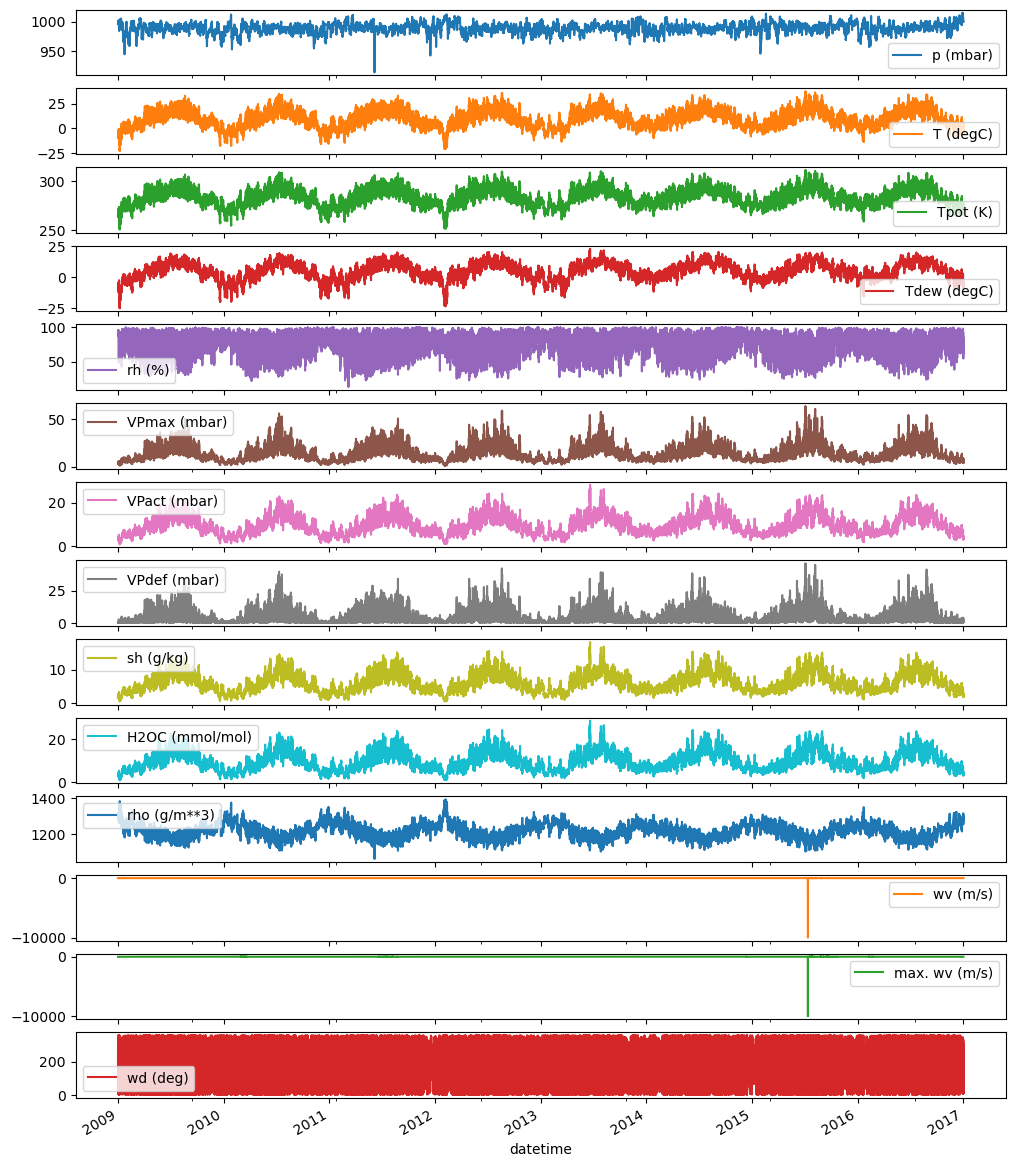

In [6]:
# Dibujaremos nuestras variables
cols = df_new.columns

N = df_new.shape[0]         # N = 24*30*12 para dibujar un año
plots = df_new[cols][0:N]
plots.index = df_new.index[0:N]
_ = plots.plot(subplots=True, figsize=(12, 16))

**Notas**:
- Las variables tienen diferentes rangos de amplitud. Antes de llevar los datos a la Red LSTM debemos escalarlas/estandarizarlas.

### 4.2 Visualización de datos faltantes

In [7]:
print('Cantidad de datos faltantes (NaN):')
for column in df_new.columns:
    print(f'Columna {column}: {df_new[column].isna().sum()}')

Cantidad de datos faltantes (NaN):
Columna p (mbar): 0
Columna T (degC): 0
Columna Tpot (K): 0
Columna Tdew (degC): 0
Columna rh (%): 0
Columna VPmax (mbar): 0
Columna VPact (mbar): 0
Columna VPdef (mbar): 0
Columna sh (g/kg): 0
Columna H2OC (mmol/mol): 0
Columna rho (g/m**3): 0
Columna wv (m/s): 0
Columna max. wv (m/s): 0
Columna wd (deg): 0


**Notas:**
- En el caso de que tuviéramos datos faltantes deberíamos completarlos

### 4.3 Garantizar periodicidad
Nuestro caso tiene muestras horarias, por lo que debemos verificar que se cumple en todo el data set

In [7]:
# Teniendo en cuenta que 1 hora son 3600 segundos,
# vamos a calcular la diferencia de tiempo entre cada fila consecutiva
# y la cantidad de datos que hay por cada intervalo
df_time_diffs = df_new.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())


datetime
600.0       420213
0.0            327
1200.0           2
1800.0           1
57600.0          1
267600.0         1
Name: count, dtype: int64


**Notas:**
- Aquí podemos observar la distribución de número de registros (columna derecha) con una diferencia dada (columna izquierda). Aquellos que no estén dentro de 3600 habrá que corregirlos.
P.ej.: Si tenemos diferencias de 600.0 significa que hay datos 10 minutales.

## 5. Tratamiento de datos 📂➡️📂

### 5.1 Números faltantes
En el caso de que hubiera, si son pocos podríamos utilizar una interpolación simple para compeltarlos.

### 5.2 Ajuste periodicidad
En nuestro ejemplo teníamos:
| Diferencia | Muestras |   Tiempo   |
|------------|----------|------------|
| 600.0      | 420218   |  (10min)   |
| 0.0        | 327      |    (*)     |
| 1200.0     | 2        |  (20min)   |
| 1800.0     | 1        |  (30min)   |
| 57600.0    | 1        |(16horas)** |
| 267600.0   | 1        |(74horas)** |

(*) Registros repetidos

(**) Para estos casos debemos ver con mas concreción que está pasando, pues hablamos de muchos datos faltantes consecutivos.

Lo que nos interesa es que nuestras muestras estén equiespaciadas a 1 hora.

In [8]:
#(1) Registros repetidos con diferencia de 0 segundos
df_new.drop_duplicates(keep='first', inplace=True, ignore_index=False)

# Verificamos que han sido eliminados
df_time_diffs = df_new.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
600.0       420209
1200.0           4
1800.0           1
57600.0          1
267600.0         1
Name: count, dtype: int64


In [9]:
# (2) Corrijamos los datos que tienen una diferencia de >0 segundos
df_new2 = df_new.asfreq(freq='h', method='bfill')  # Cambiamos la frecuencia a 1 hora y rellenamos los datos faltantes con el último valor conocido

# Verificamos la periodicidad de los datos
df_time_diffs = df_new2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())
print("----------------------------------")
# Y chequeamos de nuevo que no hay datos faltantes
print('Cantidad de datos faltantes (NaN):')
for column in df_new.columns:
    print(f'Columna {column}: {df_new[column].isna().sum()}')

datetime
3600.0    70127
Name: count, dtype: int64
----------------------------------
Cantidad de datos faltantes (NaN):
Columna p (mbar): 0
Columna T (degC): 0
Columna Tpot (K): 0
Columna Tdew (degC): 0
Columna rh (%): 0
Columna VPmax (mbar): 0
Columna VPact (mbar): 0
Columna VPdef (mbar): 0
Columna sh (g/kg): 0
Columna H2OC (mmol/mol): 0
Columna rho (g/m**3): 0
Columna wv (m/s): 0
Columna max. wv (m/s): 0
Columna wd (deg): 0


In [10]:
# Verificamos que con estos tratamientos no tenemos una desviación entre el df original y el df modificado
for column in df:
    if column in df_new2.columns:  # Verificar que la columna existe en df_new2
        if pd.api.types.is_numeric_dtype(df[column]) and pd.api.types.is_numeric_dtype(df_new2[column]):
            print(f'Promedios original/modificado: {df[column].mean():.2f}/{df_new2[column].mean():.2f}')
        else:
            print(f'La columna "{column}" no es numérica, se omite.')
    else:
        print(f'La columna "{column}" no existe en df_new2, se omite.')

La columna "Date Time" no existe en df_new2, se omite.
Promedios original/modificado: 989.21/989.23
Promedios original/modificado: 9.45/9.45
Promedios original/modificado: 283.49/283.49
Promedios original/modificado: 4.96/4.96
Promedios original/modificado: 76.01/76.03
Promedios original/modificado: 13.58/13.57
Promedios original/modificado: 9.53/9.53
Promedios original/modificado: 4.04/4.03
Promedios original/modificado: 6.02/6.02
Promedios original/modificado: 9.64/9.64
Promedios original/modificado: 1216.06/1216.10
Promedios original/modificado: 1.70/1.70
Promedios original/modificado: 3.06/2.96
Promedios original/modificado: 174.74/175.07


In [11]:
# Guardamos el nuevo dataframe
df_new2.to_csv('data/max_planck_weather_ts_preprocesado.csv', index=True)